In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Data-visualisation

In [2]:
dataset = pd.read_csv('sat.trn.csv', sep = ' ', header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


So there are 36 columns between 0 and 255 and one label column

We will now put names in the columns

In [4]:
list1 = ["top","middle","bottom"]
list2 = ["left", "middle" , "right"]
list3 = ["1","2","3","4"]

In [5]:
Noms=[]
NomsInput =[]
for i in range(len(list1)):
    for j in range(len(list2)):
        for k in range(len(list3)):
            nom = list1[i] + list2[j] + list3[k]
            Noms.append(nom)
            NomsInput.append(nom)
Noms.append('label')

In [6]:
Noms

['topleft1',
 'topleft2',
 'topleft3',
 'topleft4',
 'topmiddle1',
 'topmiddle2',
 'topmiddle3',
 'topmiddle4',
 'topright1',
 'topright2',
 'topright3',
 'topright4',
 'middleleft1',
 'middleleft2',
 'middleleft3',
 'middleleft4',
 'middlemiddle1',
 'middlemiddle2',
 'middlemiddle3',
 'middlemiddle4',
 'middleright1',
 'middleright2',
 'middleright3',
 'middleright4',
 'bottomleft1',
 'bottomleft2',
 'bottomleft3',
 'bottomleft4',
 'bottommiddle1',
 'bottommiddle2',
 'bottommiddle3',
 'bottommiddle4',
 'bottomright1',
 'bottomright2',
 'bottomright3',
 'bottomright4',
 'label']

In [7]:
NomsInput

['topleft1',
 'topleft2',
 'topleft3',
 'topleft4',
 'topmiddle1',
 'topmiddle2',
 'topmiddle3',
 'topmiddle4',
 'topright1',
 'topright2',
 'topright3',
 'topright4',
 'middleleft1',
 'middleleft2',
 'middleleft3',
 'middleleft4',
 'middlemiddle1',
 'middlemiddle2',
 'middlemiddle3',
 'middlemiddle4',
 'middleright1',
 'middleright2',
 'middleright3',
 'middleright4',
 'bottomleft1',
 'bottomleft2',
 'bottomleft3',
 'bottomleft4',
 'bottommiddle1',
 'bottommiddle2',
 'bottommiddle3',
 'bottommiddle4',
 'bottomright1',
 'bottomright2',
 'bottomright3',
 'bottomright4']

In [8]:
dataset2 = pd.read_csv('sat.trn.csv', sep = ' ', header = None, names = Noms)

In [9]:
dataset2

,topleft1,topleft2,topleft3,topleft4,topmiddle1,topmiddle2,topmiddle3,topmiddle4,topright1,topright2,...,bottomleft4,bottommiddle1,bottommiddle2,bottommiddle3,bottommiddle4,bottomright1,bottomright2,bottomright3,bottomright4,label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [10]:
valuesDtset =dataset2.values.flatten()

In [11]:
import seaborn as sns

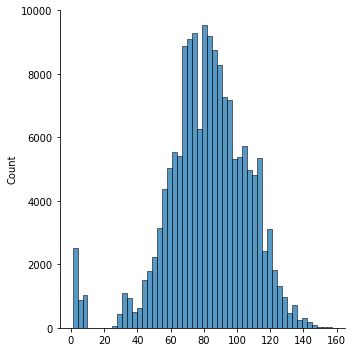

In [12]:
sns.displot(valuesDtset, binwidth=3)

we can see here that the distribution of colour data is around 80, but never exceeds 147.m

We are now going to try to visualize the images according to the label

In [13]:
import matplotlib.colors as colors

Here begins the examination with our human eyes of what the neural network sees with two ways of seeing:

- a way based on the whole intensity scale in the absolute way, it allows in theory to identify level correlations between examples of the same label the intensity scale is the same for all the images

- and another way where we amplify the differences in intensity and where we perceive the differences between the pixels of an image and we can correlate these differences between all the images of the same label.

It turns out that this is not obvious, this only highlights the power of the machine learning approach which "sees" things that humans have difficulty perceiving or even do not perceive at all.

We use a bicubic interpolation in order to smooth the image and to palie the small number of availables pixels 
and facilitate the work of the intuition

In [14]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


midnorm = MidpointNormalize(vmin=40, vcenter=80, vmax=120)

In [15]:

def fun3(cmap_vect,pix_vect,interpol = 'bicubic',normalisation='absolue'):
    # ou bien interpol = 'nearest'
    n=3
    im1 =  [pix_vect[4*j] for j in range(9)]
    im2 =  [pix_vect[1+4*j] for j in range(9)]
    im3 =  [pix_vect[2+4*j] for j in range(9)]
    im4 =  [pix_vect[3+4*j] for j in range(9)]
    a1  = [im1[0:3],im1[3:6],im1[6:9]] 
    a2  = [im2[0:3],im2[3:6],im2[6:9]] 
    a3  = [im3[0:3],im3[3:6],im3[6:9]] 
    a4  = [im4[0:3],im4[3:6],im4[6:9]] 
    plt.figure(figsize=(12,4.5))

    #use imshow to plot the array
    plt.subplot(141)
    if (normalisation == 'absolue'):
        plt.imshow(a1, cmap = cmap_vect[0],  interpolation=interpol , norm=midnorm)
    else:
        plt.imshow(a1, cmap = cmap_vect[0],  interpolation=interpol)
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('frequence 1', y=1.02, fontsize=12)

    #the same array as above, but with 2d color map
    plt.subplot(142)
    if (normalisation == 'absolue'):
        plt.imshow(a2,  cmap =cmap_vect[1], interpolation=interpol , norm=midnorm)
    else:
        plt.imshow(a2, cmap = cmap_vect[1],  interpolation=interpol)
    plt.yticks([])
    plt.xticks(range(n))
    plt.title('Frequence 2', y=1.02, fontsize=12)

    #the same array as above, but with 3d color map
    plt.subplot(143)
    if (normalisation == 'absolue'):
        plt.imshow(a3,  cmap =cmap_vect[2], interpolation=interpol , norm=midnorm)
    else:
        plt.imshow(a3, cmap = cmap_vect[2],  interpolation=interpol)
    plt.yticks([])
    plt.xticks(range(n))
    plt.title('Frequence 3', y=1.02, fontsize=12)
    
      #the same array as above, but with 4th color map
    plt.subplot(144)
    if (normalisation == 'absolue'):
        plt.imshow(a4,  cmap =cmap_vect[3], interpolation=interpol , norm=midnorm)
    else:
        plt.imshow(a4, cmap = cmap_vect[3],  interpolation=interpol)
    plt.yticks([])
    plt.xticks(range(n))
    plt.title('Frequence 4', y=1.02, fontsize=12)
    print("couleurs = ", normalisation)
    plt.show()

In [16]:
cm='viridis'

In [17]:
DataSetLabel1 = dataset2[dataset2['label']==1]
DataSetLabel2 = dataset2[dataset2['label']==2]
DataSetLabel3 = dataset2[dataset2['label']==3]
DataSetLabel4 = dataset2[dataset2['label']==4]
DataSetLabel5 = dataset2[dataset2['label']==5]
DataSetLabel7 = dataset2[dataset2['label']==7]

The four spectre for label 1
Example 0
couleurs =  relatif


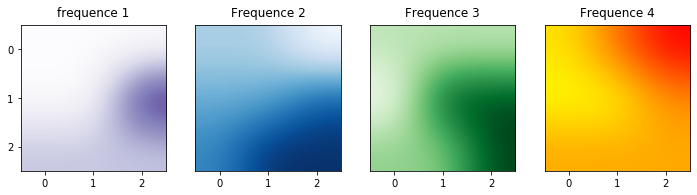

Example 1
couleurs =  relatif


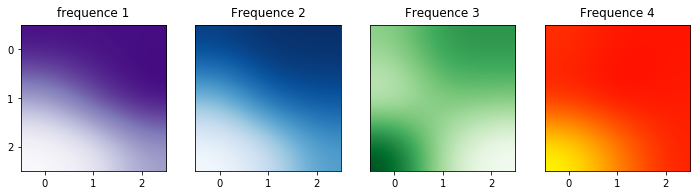

Example 2
couleurs =  relatif


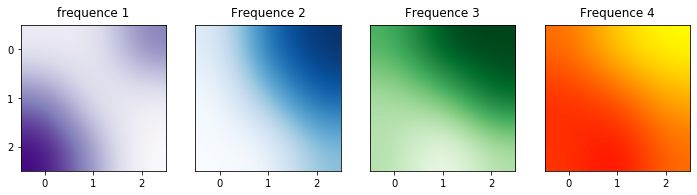

In [18]:
import random
cm='viridis'
print("The four spectre for label 1")
for i in range(3):
    y = random.randint(0, DataSetLabel1.shape[0])
    print("Example " + str(i))
#    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
#    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

The four spectre for label 2
Example 0
couleurs =  absolue


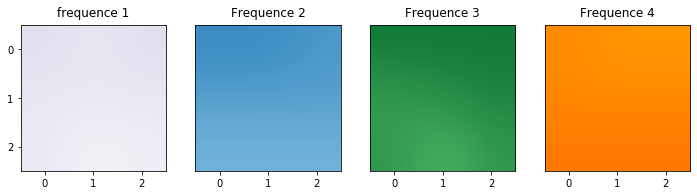

couleurs =  relatif


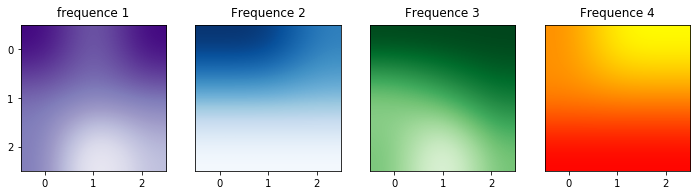

Example 1
couleurs =  absolue


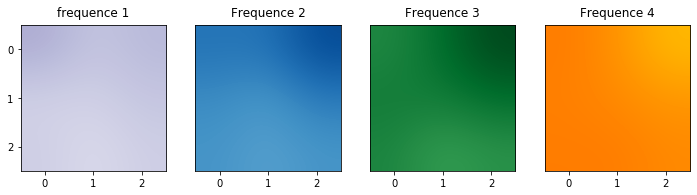

couleurs =  relatif


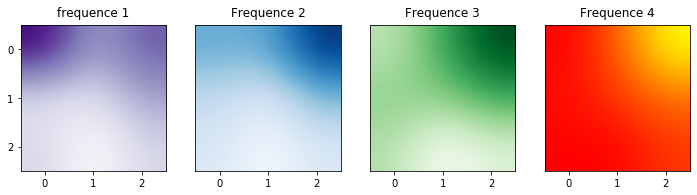

Example 2
couleurs =  absolue


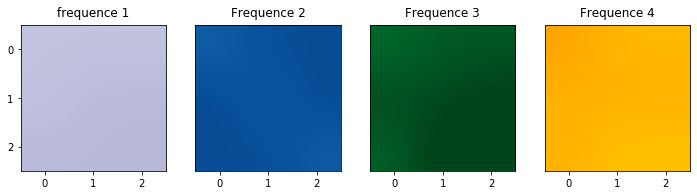

couleurs =  relatif


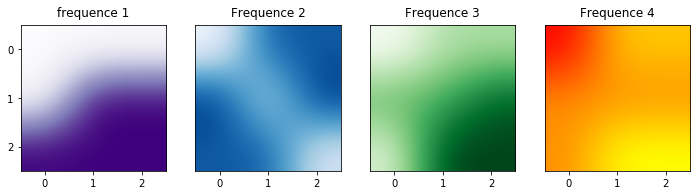

In [19]:
cm='viridis'
print("The four spectre for label 2")
for i in range(3):
    y = random.randint(0, DataSetLabel2.shape[0])
    print("Example " + str(i))
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

The four spectre for label 3
Example 0
couleurs =  absolue


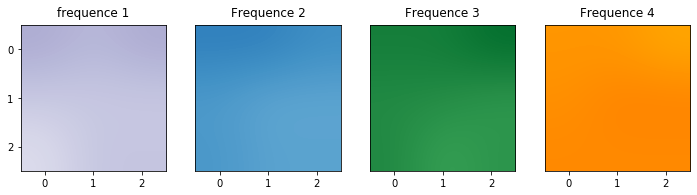

couleurs =  relatif


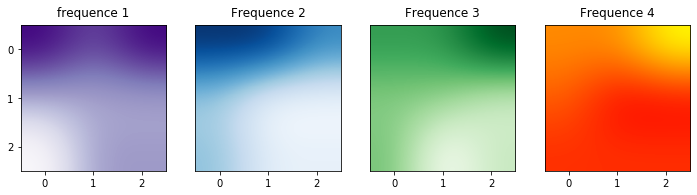

Example 1
couleurs =  absolue


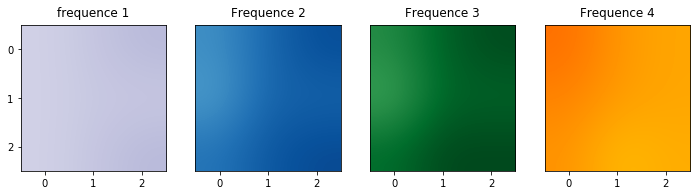

couleurs =  relatif


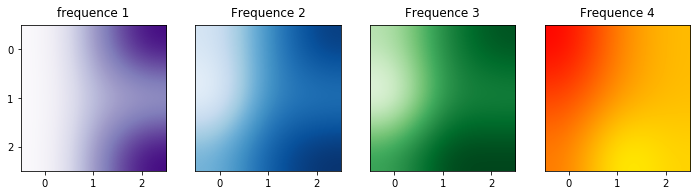

Example 2
couleurs =  absolue


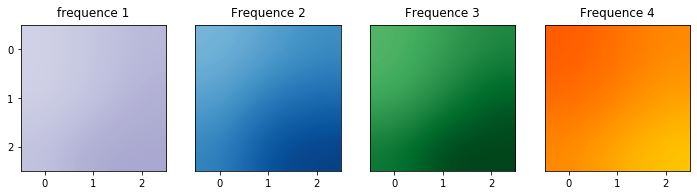

couleurs =  relatif


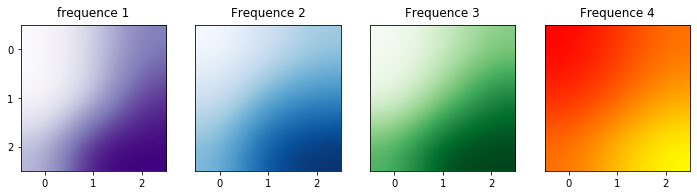

In [20]:
cm='viridis'
print("The four spectre for label 3")
for i in range(3):
    y = random.randint(0, DataSetLabel3.shape[0])
    print("Example " + str(i))
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

The four spectre for label 4
Example 0
couleurs =  absolue


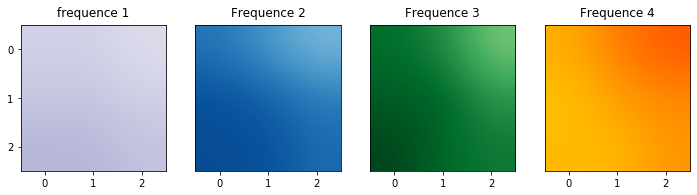

couleurs =  relatif


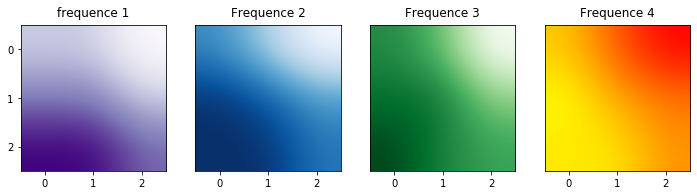

Example 1
couleurs =  absolue


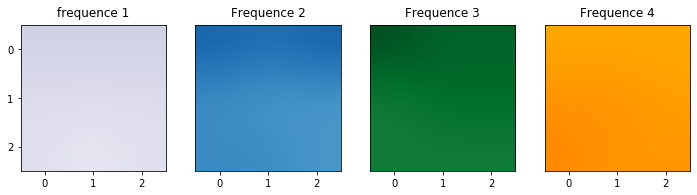

couleurs =  relatif


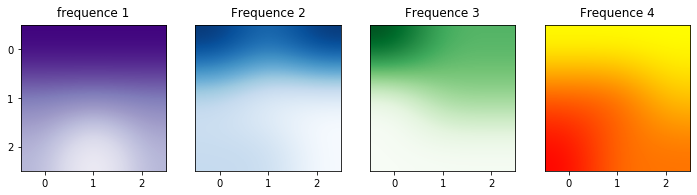

Example 2
couleurs =  absolue


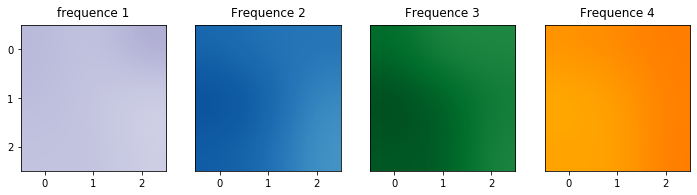

couleurs =  relatif


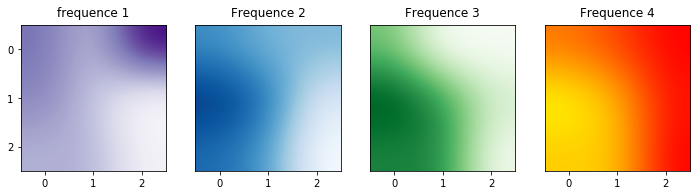

In [21]:
cm='viridis'
print("The four spectre for label 4")
for i in range(3):
    y = random.randint(0, DataSetLabel4.shape[0])
    print("Example " + str(i))
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

The four spectre for label 5
Example 0
couleurs =  absolue


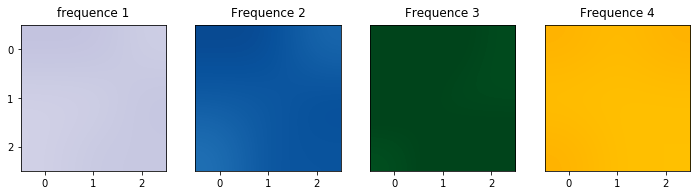

couleurs =  relatif


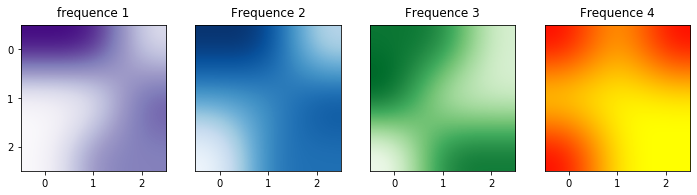

Example 1
couleurs =  absolue


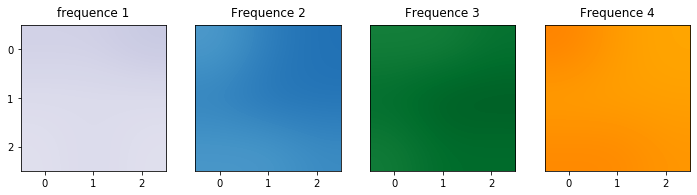

couleurs =  relatif


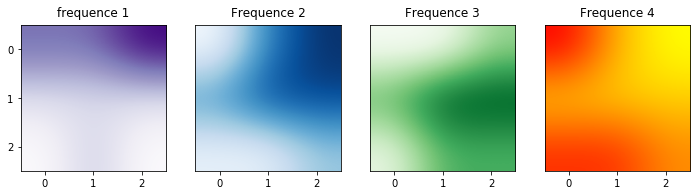

Example 2
couleurs =  absolue


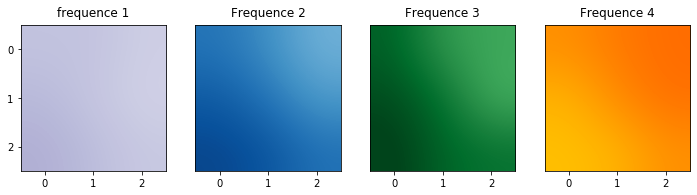

couleurs =  relatif


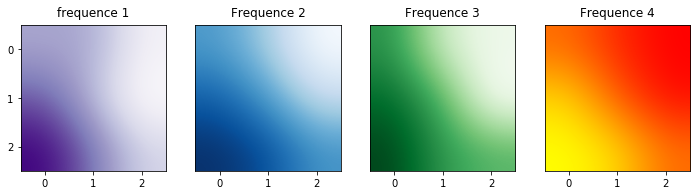

In [22]:
cm='viridis'
print("The four spectre for label 5")
for i in range(3):
    y = random.randint(0, DataSetLabel5.shape[0])
    print("Example " + str(i))
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

The four spectre for label 7
Example 0
couleurs =  absolue


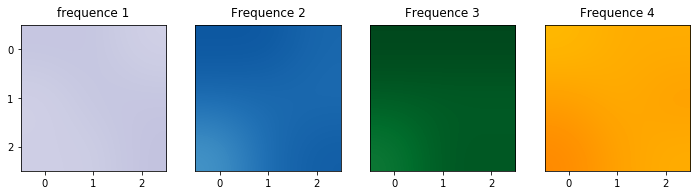

couleurs =  relatif


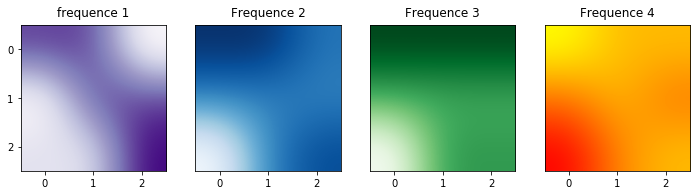

Example 1
couleurs =  absolue


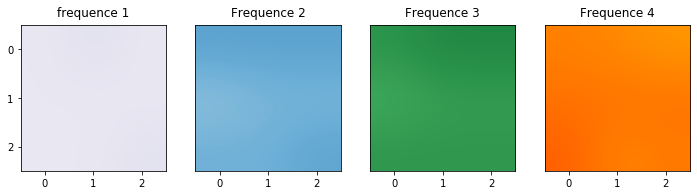

couleurs =  relatif


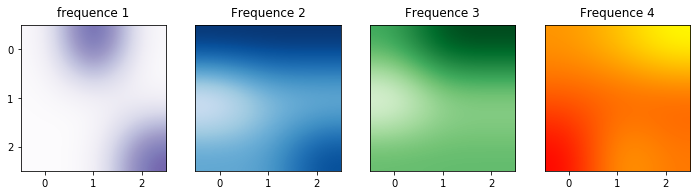

Example 2
couleurs =  absolue


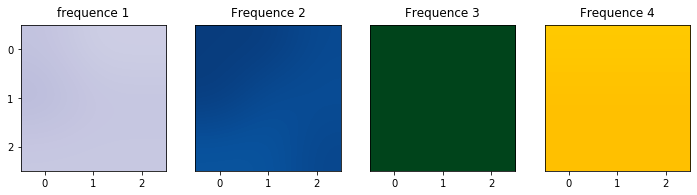

couleurs =  relatif


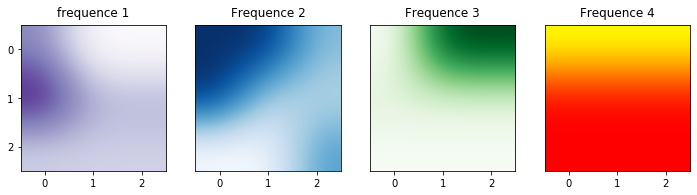

In [23]:
cm='viridis'
print("The four spectre for label 7")
for i in range(3):
    print("Example " + str(i))
    y = random.randint(0, DataSetLabel7.shape[0])
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'absolue')
    fun3(['Purples','Blues','Greens','autumn'],DataSetLabel1.iloc[y,:], interpol = 'bicubic',normalisation = 'relatif')

# Modélisation

In [24]:
datasetTest = pd.read_csv('sat.tst.csv', sep = ' ', header = None, names = Noms)

In [25]:
df = pd.DataFrame(datasetTest)

In [26]:
X_df = dataset2[NomsInput]
y_df = dataset2['label']

In [27]:
X_df_Test = datasetTest[NomsInput]
y_df_Test = datasetTest['label']

In [28]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    print(t.isoformat()[:8])
    return time.time()


### Logistic Regression 

In [29]:
import sys
from sklearn.model_selection import GridSearchCV

In [30]:
def LR_grid_search(df, Y):    
    parameters = {'penalty': ['l1','l2'],
                  'solver' : ['liblinear'],
                  'C':[0.01, 0.1, 1,10],
                  'max_iter' : [500],
                  'multi_class' : ['ovr'],
                  'class_weight' : [None, 'balanced'],
                  'random_state' : [0,34]
                 }
    
    grid_type = "LR_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    grid = GridSearchCV(LogisticRegression(), parameters)
    grid.fit(X_df,y_df)
    
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid

In [31]:
start_time = print_time()
lr = LR_grid_search(X_df,y_df)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

16:43:26
------------------------------ 
 LR_grid_search
{'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': [0.01, 0.1, 1, 10], 'max_iter': [500], 'multi_class': ['ovr'], 'class_weight': [None, 'balanced'], 'random_state': [0, 34]}
 best_score_ = 0.82 with =  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=34, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 
16:58:27

Duration time : 900.6589715480804


In [32]:
lr.score(X_df_Test,y_df_Test)

0.8215

The score is not bad, but the model takes a little time.

### K Nearst Neighbors

In [33]:
def knn_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur K Nearest Neighbors
    Plusieurs hyper-paramètres sont disponibles
    L'entrainement du modèle va s'effectuer sur plusieurs paramètres
    Le best_score représentera le modèle avec les meilleurs paramètres
    """
    import sys
    from sklearn.model_selection   import GridSearchCV
    from sklearn.neighbors         import KNeighborsClassifier
    
    import pickle

    parameters = {  "n_neighbors"    : [10],#, 3, 5, 8 , 10]                         , 
                    "weights"         : ['uniform', 'distance']                  ,
                    "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
                    "leaf_size"      : [1,3 ]                                    }
    
    
    grid_type = "knn_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    grid    = GridSearchCV(KNeighborsClassifier(), parameters, verbose=0, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1

    
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid

In [34]:
start_time = print_time()

kknn = knn_grid_search(X_df,y_df)

#for  and 3 : 0.89 (16s)
#for 5 : 0.89 (16s)
#for 8 : 0.89 (18.3s)
#for 10 : 0.89 (19s)

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

16:58:27
------------------------------ 
 knn_grid_search
{'n_neighbors': [10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 3]}
 best_score_ = 0.85 with =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform') 
16:58:46

Duration time : 19.411052703857422


In [35]:
kknn.score(X_df_Test,y_df_Test)

0.8927978109165928

A good score in a short time

### GradientBoostingClassifier

In [36]:
def clf_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du Classifier Gradient Boosting
    """
    import sys
    from sklearn.model_selection   import GridSearchCV
    from sklearn.neighbors         import KNeighborsClassifier
    from sklearn import ensemble
    from sklearn import datasets
    from sklearn.utils import shuffle
    from sklearn.metrics import mean_squared_error
    from sklearn.datasets import make_hastie_10_2
    from sklearn.ensemble import GradientBoostingClassifier
    
    import pickle

    parameters = {'n_estimators': [100]                       ,
                  'max_depth': [None,]                        ,
                  'min_samples_split': [2]                   ,
                  'learning_rate': [0.01]                                                 }
    
    grid_type = "clf_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    
    
    grid = GridSearchCV(GradientBoostingClassifier(), parameters)
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid

In [37]:
start_time = print_time()
ccc = clf_grid_search(X_df,y_df)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


16:58:47
------------------------------ 
 clf_grid_search
{'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'learning_rate': [0.01]}
 best_score_ = 0.81 with =  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
17:01:55

Duration time : 187.71772170066833


In [38]:
ccc.score(X_df_Test,y_df_Test)

0.8445

gives bad result, for 10 (n_estimators) -> 0.62 (17.7s)

for 100 (n_estimators)-> 0.81 but very very long (235.7s)

### RandomForest

In [39]:
def RandomForest_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur Random Forest
    """
    import sys, pickle
    from sklearn.ensemble          import RandomForestClassifier
    from sklearn.model_selection   import GridSearchCV
    from sklearn.metrics           import make_scorer
    from sklearn.preprocessing     import label_binarize
    from sklearn.multiclass        import OneVsRestClassifier
    #grid search :

    parameters = {  "n_estimators"         : [ 200 ], 
                    "min_samples_leaf"     : [  3,   1,   7 ],
                    "criterion"            : ["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["balanced","balanced_subsample"]          ,
                    "warm_start"           : [False]           }
    
    grid_type = "RandomForestClassifier"
    
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search 
    """
    
    
    grid         = GridSearchCV(RandomForestClassifier(), parameters, verbose=1, scoring='f1_weighted')
    
    try :grid.fit(df, Y)
    except Exception as e : print ("[%s - 2] : %s"%(grid_type,e) )
    
    print (" best_score_ %s with =  %s "%( grid.best_score_,  grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid.best_estimator_

In [40]:
start_time = print_time()
rf = RandomForest_grid_search(X_df,y_df)
#n_estimators =200 -> 0.857 (32.5s)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

17:01:55
------------------------------ 
 RandomForestClassifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   29.1s finished


 best_score_ 0.8559167916560975 with =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False) 
17:02:24

Duration time : 29.72383451461792


In [41]:
rf.score(X_df_Test,y_df_Test)

0.911

A very good score in a short period of time, so we can use this model to realize our api

In [42]:
import os
!dir

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est B088-8C76

 R‚pertoire de C:\Users\antoi\Documents\Antoine 4\datapython\Project

10/01/2021  17:02    <DIR>          .
10/01/2021  17:02    <DIR>          ..
22/12/2020  17:58    <DIR>          .ipynb_checkpoints
10/01/2021  12:59             1ÿ623 app.py
09/01/2021  18:35         9ÿ980ÿ317 final_prediction.pickle
29/12/2020  15:49    <DIR>          Nouveau dossier
10/01/2021  17:02         1ÿ360ÿ618 ProjectPython.ipynb
08/01/2021  16:32         1ÿ676ÿ181 ProjectPython1.ipynb
09/01/2021  17:43         1ÿ438ÿ571 ProjectPython4.ipynb
09/01/2021  18:12               523 request.py
22/12/2020  17:46             5ÿ254 sat.doc
22/12/2020  17:46           525ÿ830 sat.trn.csv
22/12/2020  17:46           236ÿ745 sat.tst.csv
22/12/2020  19:14             5ÿ401 sat.txt
09/01/2021  18:15    <DIR>          templates
              10 fichier(s)       15ÿ231ÿ063 octets
               5 R‚p(s)  38ÿ141ÿ587ÿ456 octets libres


In [43]:
import pickle
pickle.dump(rf, open('final_prediction.pickle', 'wb'))

### Sum Up

In [44]:
TabSumUp = pd.DataFrame({'Best Score': [0.82, 0.85, 0.81,0.857], 'Time(s)': [877, 18.9, 235.7,32.5], 'Test Score': [0.82, 0.89, 0.84,0.91]},
                      index = ['LogisticRegression', 'KNeighborsClassifier', 'GradientBoostingClassifier','RandomForest'])

In [45]:
TabSumUp

,Best Score,Time(s),Test Score
LogisticRegression,0.820,877.0,0.82
KNeighborsClassifier,0.850,18.9,0.89
GradientBoostingClassifier,0.810,235.7,0.84
RandomForest,0.857,32.5,0.91


Here we can see that random forest is the best in terms of accuracy/time performance.

### Neural network

I made an extra neural network, but it won't be in the api, in fact the more you train it (the number of epochs) the more the accuracy increases.

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaledTest = scaler.fit_transform(X_df_Test)
X_scaled

array([[ 1.6504898 ,  1.37065618,  1.24035744, ...,  1.04773951,
         0.83669871,  0.23370924],
       [ 1.06432744,  0.79853645,  0.40053984, ...,  0.69624747,
         0.29644556, -0.18971944],
       [ 1.06432744,  0.79853645,  0.16059195, ...,  0.69624747,
         0.29644556, -0.18971944],
       ...,
       [-0.10799728, -0.38971222,  0.52051378, ...,  0.74018398,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.1383983 ,  0.52051378, ...,  0.34475544,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.31443514,  0.04061801, ...,  0.34475544,
         0.05633305, -0.08386227]])

In [47]:
model = tf.keras.models.Sequential()

In [48]:
model.add(tf.keras.layers.Dense(units = 50, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = 36))

In [49]:
model.add(tf.keras.layers.Dense(units = 8, activation = 'softmax', kernel_initializer = 'he_uniform'))

In [50]:
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1850      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 408       
Total params: 2,258
Trainable params: 2,258
Non-trainable params: 0
_________________________________________________________________


In [52]:
X_final = np.asarray(X_scaled)
y_final = np.asarray(y_df)
X_final_Test = np.asarray(X_scaledTest)
y_final_Test = np.asarray(y_df_Test)
X_final

array([[ 1.6504898 ,  1.37065618,  1.24035744, ...,  1.04773951,
         0.83669871,  0.23370924],
       [ 1.06432744,  0.79853645,  0.40053984, ...,  0.69624747,
         0.29644556, -0.18971944],
       [ 1.06432744,  0.79853645,  0.16059195, ...,  0.69624747,
         0.29644556, -0.18971944],
       ...,
       [-0.10799728, -0.38971222,  0.52051378, ...,  0.74018398,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.1383983 ,  0.52051378, ...,  0.34475544,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.31443514,  0.04061801, ...,  0.34475544,
         0.05633305, -0.08386227]])

In [55]:
model.fit(X_final,y_final,epochs = 100)

Epoch 1/100
139/139 [==============================] - 0s 971us/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8900
Epoch 2/100
139/139 [==============================] - 0s 890us/step - loss: 0.2724 - sparse_categorical_accuracy: 0.8945
Epoch 3/100
139/139 [==============================] - 0s 899us/step - loss: 0.2644 - sparse_categorical_accuracy: 0.8952
Epoch 4/100
139/139 [==============================] - 0s 916us/step - loss: 0.2593 - sparse_categorical_accuracy: 0.9010
Epoch 5/100
139/139 [==============================] - 0s 898us/step - loss: 0.2525 - sparse_categorical_accuracy: 0.8985
Epoch 6/100
139/139 [==============================] - 0s 886us/step - loss: 0.2504 - sparse_categorical_accuracy: 0.9003
Epoch 7/100
139/139 [==============================] - 0s 926us/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9044 0s - loss: 0.2433 - sparse_categorical_accuracy: 0.904
Epoch 8/100
139/139 [==============================] - 0s 900us/step - loss: 0.2400 - spars

139/139 [==============================] - 0s 835us/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9459
Epoch 67/100
139/139 [==============================] - 0s 862us/step - loss: 0.1459 - sparse_categorical_accuracy: 0.9436
Epoch 68/100
139/139 [==============================] - 0s 859us/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9418
Epoch 69/100
139/139 [==============================] - 0s 872us/step - loss: 0.1479 - sparse_categorical_accuracy: 0.9463
Epoch 70/100
139/139 [==============================] - 0s 891us/step - loss: 0.1448 - sparse_categorical_accuracy: 0.9452
Epoch 71/100
139/139 [==============================] - 0s 872us/step - loss: 0.1448 - sparse_categorical_accuracy: 0.9434
Epoch 72/100
139/139 [==============================] - 0s 1ms/step - loss: 0.1418 - sparse_categorical_accuracy: 0.9470
Epoch 73/100
139/139 [==============================] - 0s 1ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0.9466
Epoch 74/100
139/139 [===========

In [56]:
test_loss, test_accuracy = model.evaluate(X_final_Test,y_final_Test)

63/63 [==============================] - 0s 842us/step - loss: 0.2895 - sparse_categorical_accuracy: 0.9055
